Analysis EDA and Forecasting about COVID-19 Status in HongKong

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
import os
import folium
from datetime import datetime
from IPython.display import Image
import datetime as dt
import pylab as pl
import matplotlib.dates as mdates
import mars.dataframe as md
from IPython.display import HTML
from fbprophet import Prophet
import pystan
from fbprophet import Prophet
sns.set(rc={"figure.figsize": (18,10)})

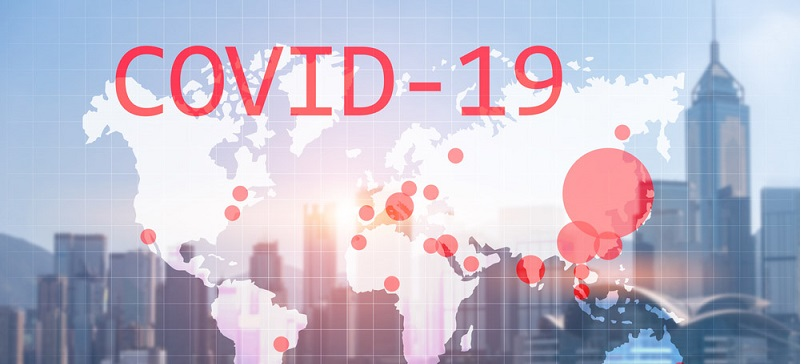

In [5]:
#Gif in here
Image("D:/Temp/Coronavirus and Hong Kong Real Estate.jpg")

From 1/Jan To 10/Jul Crown-9 Status in HongKong

In [6]:
os.chdir('D:\Temp\crowndata')
Crown_data=pd.read_csv('enhanced_sur_covid_19_eng0716.csv')
Crown_data29=pd.read_csv('enhanced_sur_covid_19_eng0729.csv')
impexp_data=pd.read_csv('hongkong_covid_(importExp).csv')

In [7]:
#Crown_data.head()
Crown_data.tail()
#Crown_data.columns

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
1651,1652,16/07/2020,13/07/2020,M,55,Queen Mary Hospital,Hospitalised,HK Resident,Local case,Confirmed
1652,1653,16/07/2020,14/07/2020,F,39,Yan Chai Hospital,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1653,1654,16/07/2020,15/07/2020,F,31,Princess Margaret Hospital,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1654,1655,16/07/2020,14/07/2020,M,43,Pending,Pending admission,HK Resident,Epidemiologically linked with local case,Confirmed
1655,1656,16/07/2020,14/07/2020,M,60,Alice Ho Miu Ling Nethersole Hospital,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed


In [ ]:
#mars
df=md.read_csv()

Confirmed Statistics of Everymonth

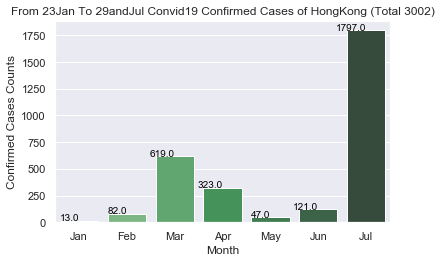

<Figure size 432x288 with 0 Axes>

In [9]:
#x 軸改成英文日期

months = mdates.MonthLocator()
x=np.arange(7)
Crown_data29.rename(columns={'Report date':'ReportDate'},inplace=True)
Crown_data29["ReportDate"] = pd.to_datetime(Crown_data29["ReportDate"], format='%d/%m/%Y', errors='ignore')
Crown_data29["xDate"]=Crown_data29["ReportDate"]

Crown_data29["xDate"]= Crown_data29['ReportDate'].dt.strftime('%b')
Crown_data29['month'] = pd.DatetimeIndex(Crown_data29['ReportDate']).month

data_cofim=pd.get_dummies(Crown_data29['Confirmed/probable'],prefix='Confirmed/probable')
data_cofim.rename(columns={'Confirmed/probable_Confirmed':'Confirmed'},inplace=True)
data_cofim.rename(columns={'Confirmed/probable_Probable':'Probable'},inplace=True)

mon_date=Crown_data29[['month','xDate']]

merge_data=pd.concat([mon_date,data_cofim],axis=1)

resuldata=merge_data.groupby(['month']).sum().reset_index() 

#resuldata.sort_values(by='month',inplace=True)
resuldata.set_index('month')

#setting
plt.subplots_adjust(bottom=0.18)
pal = sns.color_palette("Greens_d",len(resuldata))
#
rank = resuldata["month"].argsort().argsort()
#text
g = sns.barplot(x="month",y="Confirmed",data=resuldata,palette=np.array(pal[::-1])[rank])
for index,row in resuldata.iterrows():
 g.text(row.name,row.Confirmed,round(row.Confirmed,2),color="black",ha="right")
#title
plt.xlabel("Month")
plt.ylabel("Confirmed Cases Counts")
plt.xticks(x,('Jan','Feb','Mar','Apr','May','Jun','Jul'))
plt.title("From 23Jan To 29andJul Convid19 Confirmed Cases of HongKong (Total 3002)")
plt.show()
plt.savefig(r'\test.png',transparent = True)

In [32]:
resuldata['Confirmed'].sum()

3002.0

Text(0.5, 0, 'Month')

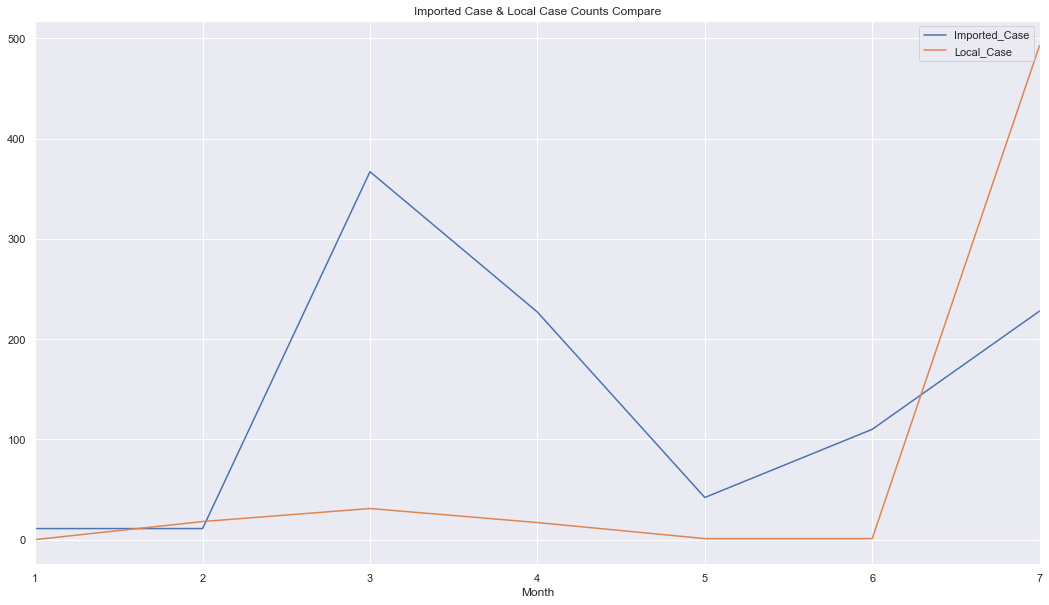

In [19]:
#import case count with local case compare
impexp_data.tail()
impexp_data.rename(columns={'Report date':'inoutDate'},inplace=True)
impexp_data.rename(columns={'Case classification*':'CaseStatus'},inplace=True)
impexp_data['inoutDate']=pd.to_datetime(impexp_data['inoutDate'],format='%d/%m/%Y',errors='ignore')
impexp_data['month']=pd.DatetimeIndex(impexp_data['inoutDate']).month
dategroup=impexp_data['month']
dategroup.reset_index()
case_data=pd.get_dummies(impexp_data['CaseStatus'],prefix='CaseStatus')
case_data.rename(columns={'CaseStatus_Epidemiologically linked with imported case':'Epidemiologically_With_Imported_Case'},inplace=True)
case_data.rename(columns={'CaseStatus_Epidemiologically linked with local case':'Epidemiologically_With_Local_Case'},inplace=True)
case_data.rename(columns={'CaseStatus_Epidemiologically linked with possibly local case':'Epidemiologically_Possibly_Local_Case'},inplace=True)
case_data.rename(columns={'CaseStatus_Imported case':'Imported_Case'},inplace=True)
case_data.rename(columns={'CaseStatus_Local case':'Local_Case'},inplace=True)
case_data.rename(columns={'CaseStatus_Possibly local case':'Possibly_Local_Case'},inplace=True)

case_data1=case_data[['Imported_Case','Local_Case']]
casegroup=pd.concat([dategroup,case_data1],axis=1)
case_data1.reset_index()
alldata=pd.concat([dategroup,case_data1],axis=1)
displaydata=alldata.groupby(alldata['month']).sum()
displaydata.plot()
plt.title("Imported Case & Local Case Counts Compare")
plt.xlabel("Month")

AA

In [11]:
resuldata=pd.DataFrame(resuldata["Confirmed"])
resuldata.describe().round()

,Confirmed
count,7.0
mean,429.0
std,639.0
min,13.0
25%,64.0
50%,121.0
75%,471.0
max,1797.0


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


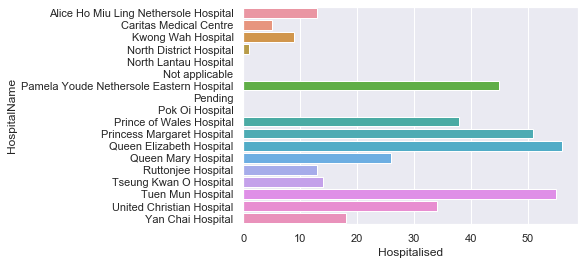

In [13]:

# Data sorce of Hospital just update to 16/Jul
guest_data=Crown_data[['Name of hospital admitted','Hospitalised/Discharged/Deceased']]

Hos_inout_data=pd.get_dummies(guest_data['Hospitalised/Discharged/Deceased'],prefix='Hospitalised/Discharged/Deceased')
Hos_inout_data.rename(columns={'Hospitalised/Discharged/Deceased_Discharged':'Discharged'},inplace=True)
Hos_inout_data.rename(columns={'Hospitalised/Discharged/Deceased_Hospitalised':'Hospitalised'},inplace=True)
Hos_inout_data.rename(columns={'Hospitalised/Discharged/Deceased_Deceased':'Deceased'},inplace=True)
Hos_inout_data.rename(columns={'Hospitalised/Discharged/Deceased_No admission':'No admission'},inplace=True)
Hos_inout_data.rename(columns={'Hospitalised/Discharged/Deceased_Pending admission':'Pending admission'},inplace=True)
#Hos_inout_data=Hos_inout_data[['Hospitalised','Deceased']]
guest_dataH=Crown_data[['Name of hospital admitted']]
guest_dataH.rename(columns={'Name of hospital admitted':'HospitalName'},inplace=True)
Inout_status=pd.concat([guest_dataH,Hos_inout_data],axis=1)
view_data=Inout_status.groupby(by='HospitalName').sum()
view_data.reset_index(inplace=True)
view_data_hos=view_data[['HospitalName','Hospitalised']]
sns.barplot(x='Hospitalised',y='HospitalName',data=view_data_hos)

In [14]:
view_data

,HospitalName,Deceased,Discharged,Hospitalised,No admission,Pending admission
0,Alice Ho Miu Ling Nethersole Hospital,0,45,13,0,0
1,Caritas Medical Centre,1,22,5,0,0
2,Kwong Wah Hospital,0,19,9,0,0
3,North District Hospital,0,37,1,0,0
4,North Lantau Hospital,0,2,0,0,0
5,Not applicable,0,0,0,7,0
6,Pamela Youde Nethersole Eastern Hospital,3,139,45,0,0
7,Pending,0,0,0,0,7
8,Pok Oi Hospital,0,2,0,0,0
9,Prince of Wales Hospital,2,125,38,0,0


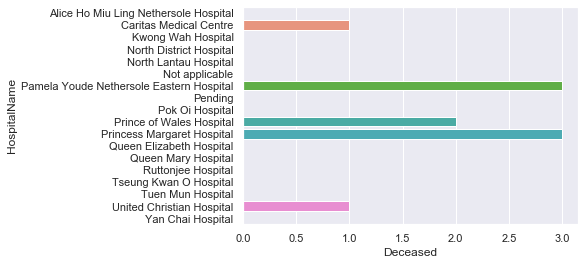

In [15]:
view_data_dec=view_data[['HospitalName','Deceased']]
sns.barplot(x='Deceased',y='HospitalName',data=view_data_dec)

Text(0.5, 1.0, 'Male & Female Comfirmed Compare')

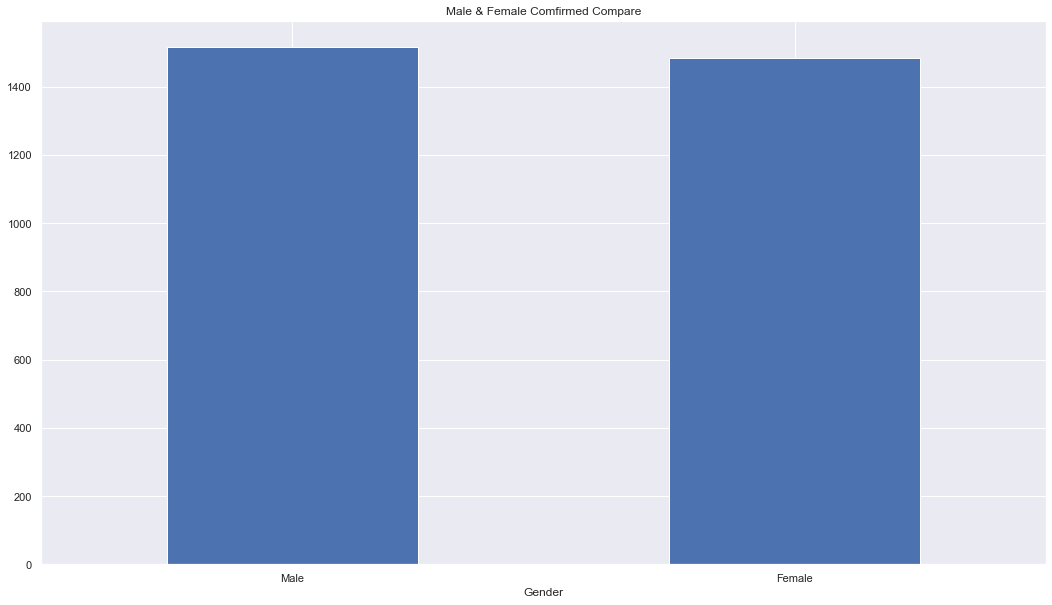

In [20]:
#by sex for comfired
sexdata=Crown_data29['Gender']
comparemf=pd.concat([sexdata,data_cofim],axis=1)
mf=comparemf['Confirmed'].groupby(comparemf['Gender']).sum()

mf.plot(kind='bar')
plt.xticks(np.arange(2),('Male','Female'),rotation=360)
plt.title("Male & Female Comfirmed Compare")

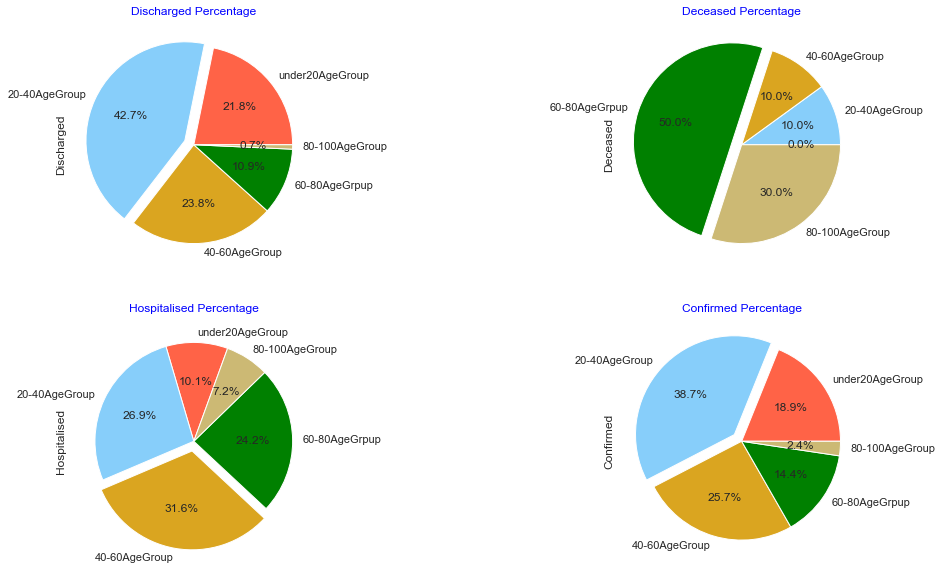

In [18]:
#根據年齡段得出出院康復率
guest_age=Crown_data['Age']
colors = ['tomato', 'lightskyblue', 'goldenrod', 'green', 'y']
cutdata=pd.concat([guest_age,Hos_inout_data],axis=1)
cutdata['splitdata']=pd.cut(cutdata['Age'],[0,20,40,60,80,100],
                            labels=['under20AgeGroup','20-40AgeGroup','40-60AgeGroup','60-80AgeGrpup','80-100AgeGroup'])
disdata=cutdata['Discharged'].groupby(cutdata['splitdata']).sum()
disdata.reset_index()
plt.subplot(2,2,1)
plt.title('Interesting Graph',color='blue') 
disdata.plot(kind='pie',title='Discharged Percentage',autopct='%.1f%%',colors=colors,explode=(0,0.1,0,0,0))

decdata=cutdata['Deceased'].groupby(cutdata['splitdata']).sum()
decdata.reset_index()
plt.subplot(2,2,2)
plt.title('Interesting Graph',color='blue') 
decdata.plot(kind='pie',title='Deceased Percentage',autopct='%1.1f%%',colors=colors,explode=(0,0,0,0.1,0))

hosdata=cutdata['Hospitalised'].groupby(cutdata['splitdata']).sum()
hosdata.reset_index()
plt.subplot(2,2,3)
plt.title('Interesting Graph',color='blue') 
hosdata.plot(kind='pie',title='Hospitalised Percentage',startangle=70,autopct='%1.1f%%',colors=colors,explode=(0,0,0.1,0,0))

cutdata2=pd.concat([guest_age,data_cofim],axis=1)
cutdata2['splitdata2']=pd.cut(cutdata2['Age'],[0,20,40,60,80,100],labels=['under20AgeGroup','20-40AgeGroup','40-60AgeGroup','60-80AgeGrpup','80-100AgeGroup'])
comdata=cutdata2['Confirmed'].groupby(cutdata2['splitdata2']).sum()
comdata.reset_index()
plt.subplot(2,2,4)
plt.title('Interesting Graph',color='blue') 
comdata.plot(kind='pie',title='Confirmed Percentage',autopct='%1.1f%%',colors=colors,explode=(0,0.1,0,0,0))
plt.show()

In [99]:
#view_data

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


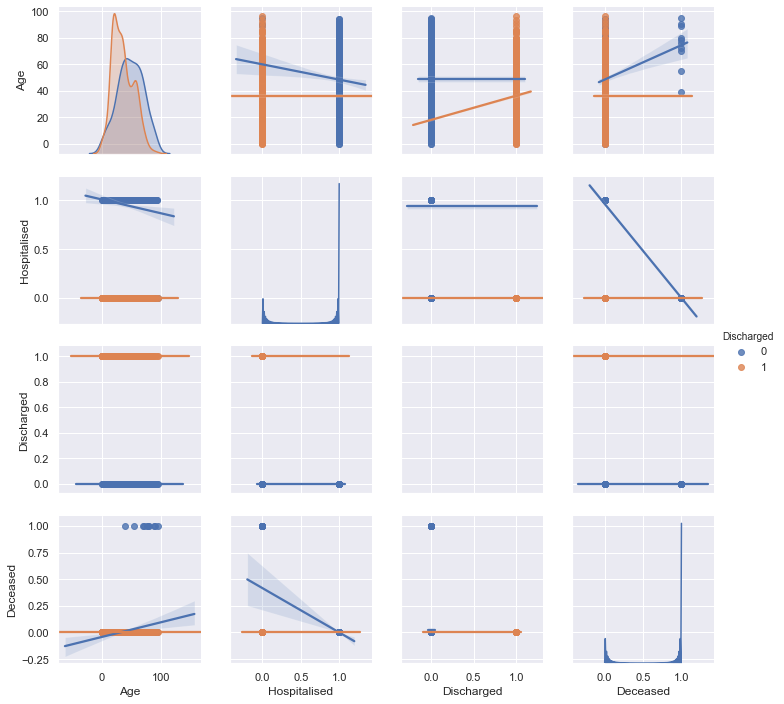

In [48]:
## Age with hospitalised & Deceased heamap
Crown_Age=Crown_data[['Age']]
view_data_Thr=Hos_inout_data[['Hospitalised','Discharged','Deceased']]
groupAge=pd.concat([Crown_Age,view_data_Thr],axis=1)
sns.pairplot(groupAge,kind="reg",hue="Discharged",vars=["Age","Hospitalised","Discharged","Deceased"])

In [140]:
#month_data.round()

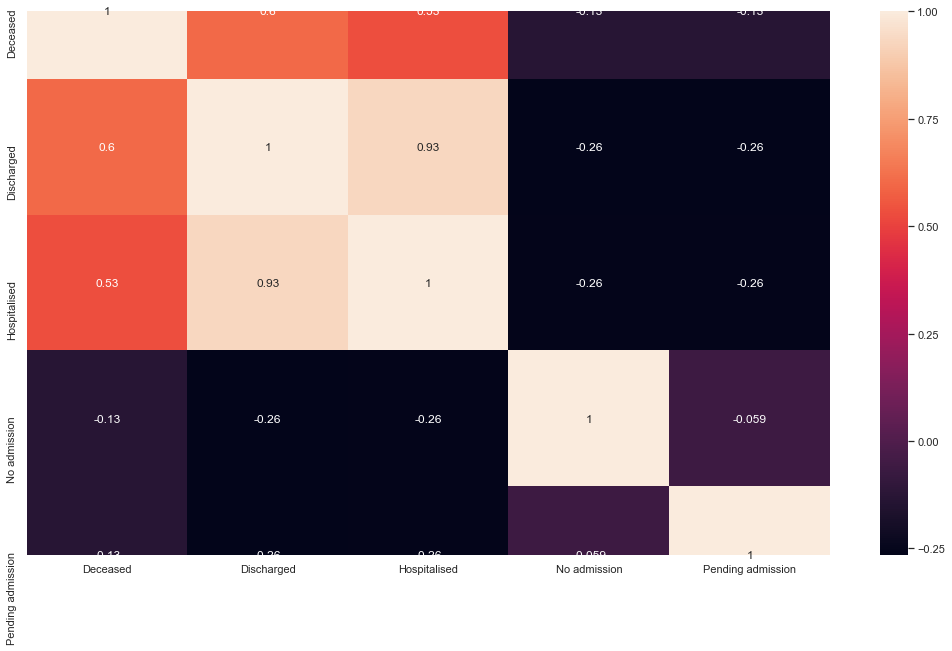

In [20]:
agedata=view_data.corr()
sns.heatmap(agedata,annot=True)

In [21]:
d6=Crown_data[Crown_data['month'].isin(['6'])]
d7=Crown_data[Crown_data['month'].isin(['7'])]
d6spl=pd.get_dummies(d6['Hospitalised/Discharged/Deceased'],prefix='Hospitalised/Discharged/Deceased')
d6spl
d6name=d6[['month']]
d6name
d6all=pd.concat([d6name,d6spl],axis=1)
d6all.rename(columns={'Hospitalised/Discharged/Deceased_Discharged':'Discharged'},inplace=True)
d6all.rename(columns={'Hospitalised/Discharged/Deceased_Hospitalised':'Hospitalised'},inplace=True)
d6all.rename(columns={'Hospitalised/Discharged/Deceased_Deceased':'Deceased'},inplace=True)
d6all.rename(columns={'Hospitalised/Discharged/Deceased_Pending admission':'Pending admission'},inplace=True)
d6all
d7spl=pd.get_dummies(d7['Hospitalised/Discharged/Deceased'],prefix='Hospitalised/Discharged/Deceased')
d7spl
d7name=d7[['month']]
d7name
d7all=pd.concat([d7name,d7spl],axis=1)
d7all.rename(columns={'Hospitalised/Discharged/Deceased_Discharged':'Discharged'},inplace=True)
d7all.rename(columns={'Hospitalised/Discharged/Deceased_Hospitalised':'Hospitalised'},inplace=True)
d7all.rename(columns={'Hospitalised/Discharged/Deceased_Deceased':'Deceased'},inplace=True)
d7all.rename(columns={'Hospitalised/Discharged/Deceased_Pending admission':'Pending admission'},inplace=True)
d7all
d6all.groupby('month').sum()

,Deceased,Discharged,Hospitalised
month,,,
6,3,114,4


In [22]:
d7all.groupby('month').sum()

,Deceased,Discharged,Hospitalised,Hospitalised/Discharged/Deceased_No admission,Pending admission
month,,,,,
7,3.0,60.0,373.0,7.0,7.0


In [175]:
#plt.figure(figsize=(10,8))
#sns.kdeplot(d6all['Hospitalised'],color='blue')
#sns.kdeplot(d7all['Hospitalised'],color='red')
#sns.kdeplot(d6all['Hospitalised'],color='green')
#sns.kdeplot(d7all['Hospitalised'],color='black')
#plt.title('Jun Hospitalised vs Jul Hospitalised',size=20) 
#plt.xlabel('GDP per capita') 
#plt.ylabel('Hospitalised') 
#plt.show()

In [257]:
# 18 districts in which more than 2 probable/confirmed cases have resided in the past 14 days
build_data=pd.read_csv('building_list_eng29.csv')
build_data.rename(columns={'Related probable/confirmed cases':'Confirmed_Case_Counts'},inplace=True)
build_data=build_data[['District','Confirmed_Case_Counts']]
info_case=build_data['Confirmed_Case_Counts'].str.split(',',expand=True)
info_case=info_case.stack()
info_case=info_case.reset_index(level=1,drop=True).rename('Case_Counts')
info_new=build_data.drop(['Confirmed_Case_Counts'],axis=1).join(info_case)
#info_new['Case_Counts'].groupby(info_new['District'])
District=info_new.groupby("District")
Disdata=District.size()

In [258]:
Disdata

District
Central & Western     44
Eastern               82
Islands               25
Kowloon City         159
Kwai Tsing           121
Kwun Tong            241
North                101
Sai Kung             116
Sha Tin              163
Sham Shui Po         168
Southern              29
Tai Po                48
Tsuen Wan             59
Tuen Mun             234
Wan Chai              88
Wong Tai Sin         538
Yau Tsim Mong        256
Yuen Long             82
dtype: int64

In [265]:
#with 2 or more probable/confirmed cases have resided in the past 14 days(25/07/2020)
longitude = 114.1693611
latitude = 22.3193039
#tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}&ltype=6'

# Create map and display it
tooltip ='Please click for informations'
case_map = folium.Map(location=[latitude, longitude]
                     , zoom_start=11
                    # ,tiles='https://{s}.tile.thunderforest.com/pioneer/{z}/{x}/{y}.png?apikey={tfkey}'
                    )
case_map.add_child(folium.Marker(location=[22.286667,114.155],tooltip=tooltip,popup='Central&Western CaseCounts 44',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.284167,114.224167],tooltip=tooltip,popup='Eastern CaseCounts 82',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.261111,113.946111],tooltip=tooltip,popup='Islands CaseCounts 25',icon=folium.Icon(color='blue'))) 
case_map.add_child(folium.Marker(location=[22.328333,114.181667],tooltip=tooltip,popup='Kowloon City CaseCounts 159',icon=folium.Icon(color='pink'))) 
case_map.add_child(folium.Marker(location=[22.355,114.083889],tooltip=tooltip,popup='Kwai Tsing CaseCounts 121',icon=folium.Icon(color='blue'))) 
case_map.add_child(folium.Marker(location=[22.313333,114.225833],tooltip=tooltip,popup='Kwun Tong CaseCounts 241',icon=folium.Icon(color='pink')))
case_map.add_child(folium.Marker(location=[22.494722,114.138056],tooltip=tooltip,popup='North CaseCounts 101',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.381389,114.270556],tooltip=tooltip,popup='Sai Kung CaseCounts 116',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.385556,114.193056],tooltip=tooltip,popup='Sha Tin CaseCounts 163',icon=folium.Icon(color='pink')))
case_map.add_child(folium.Marker(location=[22.330833,114.162222],tooltip=tooltip,popup='Sham Shui Po CaseCounts 168',icon=folium.Icon(color='pink')))
case_map.add_child(folium.Marker(location=[22.247222,114.158889],tooltip=tooltip,popup='Southern CaseCounts 29',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.441178,114.164772],tooltip=tooltip,popup='Tai Po CaseCounts 48',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.374444,114.115],tooltip=tooltip,popup='Tsuen Wan CaseCounts 59',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.390264,113.976255],tooltip=tooltip,popup='Tuen Mun CaseCounts 234',icon=folium.Icon(color='pink')))
case_map.add_child(folium.Marker(location=[22.390264,113.976255],tooltip=tooltip,popup='Wan Chai CaseCounts 88',icon=folium.Icon(color='blue')))
case_map.add_child(folium.Marker(location=[22.333611,114.196944],tooltip=tooltip,popup='Wong Tai Sin  CaseCounts 538',icon=folium.Icon(color='red')))
case_map.add_child(folium.CircleMarker(location=[22.333611,114.196944],tooltip=tooltip,popup='Wong Tai Sin  CaseCounts 538',max_width=1000,min_width=1000,radius=25,fill=True,fill_color='crimson',icon=folium.Icon(color='red')))
case_map.add_child(folium.Marker(location=[22.321389,114.1725],tooltip=tooltip,popup='Yau Tsim Mong CaseCounts 256',icon=folium.Icon(color='red')))
case_map.add_child(folium.CircleMarker(location=[22.321389,114.1725],tooltip=tooltip,popup='Yau Tsim Mong CaseCounts 256',radius=25,fill=True,fill_color='crimson',icon=folium.Icon(color='red')))
case_map.add_child(folium.Marker(location=[22.445556,114.022222],tooltip=tooltip,popup='Yuen Long CaseCounts 82',icon=folium.Icon(color='blue')))

case_map

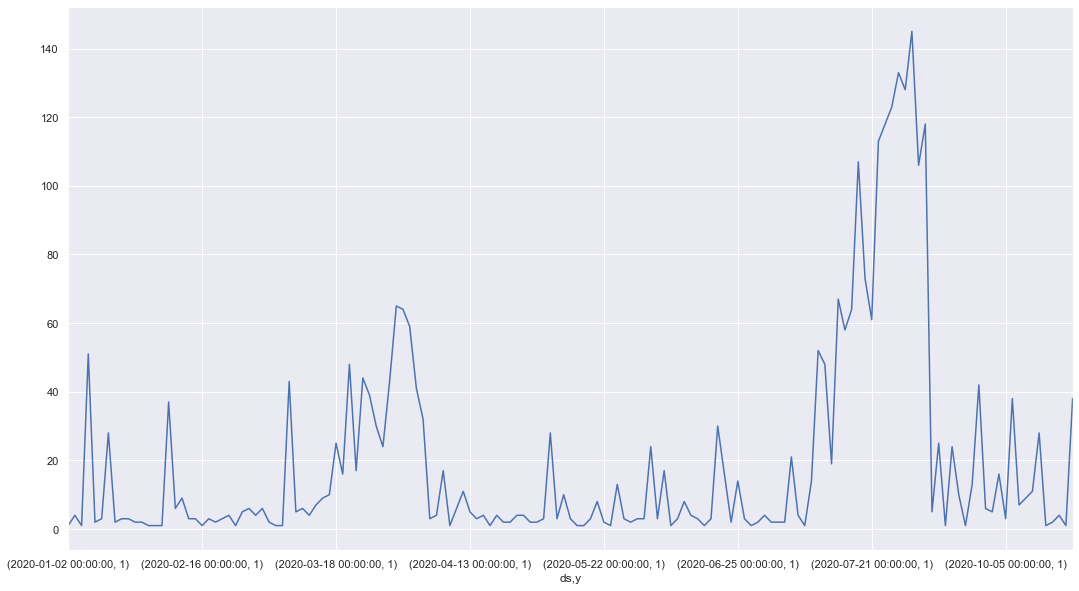

In [267]:
#future
futrue_data=pd.read_csv('enhanced_sur_covid_19_eng0729.csv')
futrue_data=futrue_data[['Report date','Confirmed/probable']]
spilt_data=pd.get_dummies(futrue_data['Confirmed/probable'],prefix='Confirmed/probable')
spilt_data.rename(columns={'Confirmed/probable_Confirmed':'Confirmed'},inplace=True)
spilt_data=spilt_data[['Confirmed']]

Comtraining_data=pd.concat([futrue_data,spilt_data],axis=1)
Comtraining_data.rename(columns={'Report date':'ds','Confirmed':'y'},inplace=True)
#df['ds'] = df['ds'].apply(pd.to_datetime)
Comtraining_data=Comtraining_data[['ds','y']]
Comtraining_data['ds']=Comtraining_data['ds'].apply(pd.to_datetime)

#Comtraining_data.set_index('ds').plot()
Comtraining_data.reset_index()
record=Comtraining_data['y'].groupby(Comtraining_data['ds']).value_counts()
record.plot()

In [226]:
#Comtraining_data
prophet = Prophet()
prophet.fit(Comtraining_data)
future = prophet.make_future_dataframe(periods=180)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
3178,2021-06-01
3179,2021-06-02
3180,2021-06-03
3181,2021-06-04
3182,2021-06-05


In [279]:
forecast = prophet.predict(future)
forecast[['ds','trend','yhat', 'yhat_lower','yhat_upper']].tail()

,ds,trend,yhat,yhat_lower,yhat_upper
3178,2021-06-01,0.999590,1.000384,0.975362,1.025589
3179,2021-06-02,0.999588,0.999589,0.976212,1.023651
3180,2021-06-03,0.999587,0.999685,0.972962,1.024325
3181,2021-06-04,0.999586,0.997285,0.972978,1.021961
3182,2021-06-05,0.999584,1.000877,0.974755,1.025025


Figure(720x432)


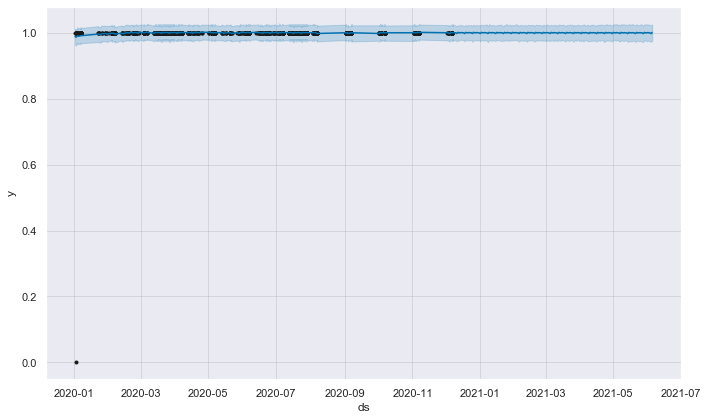

In [280]:
fig1 = prophet.plot(forecast)
print(fig1)

Figure(648x432)


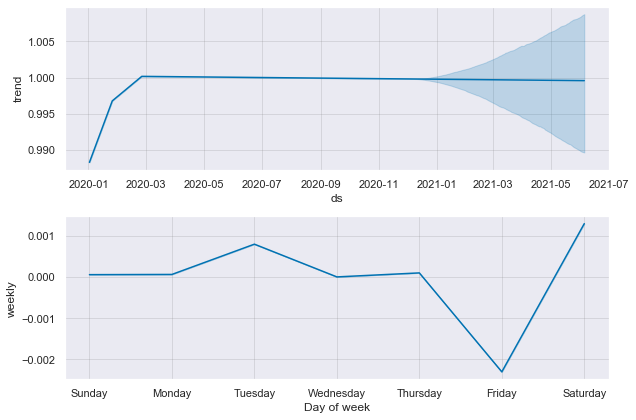

In [281]:
fig2 = prophet.plot_components(forecast)
print(fig2)